In [2]:
#Importing Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#Importing the dataset

df = pd.read_csv('segmented_customers.csv')

In [25]:
#Performing exploratory data analysis:

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
cluster                   200 non-null int64
dtypes: int64(5), object(1)
memory usage: 8.6+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,200.000000,200.000000,200.000000,200.000000,200.00000
mean,100.500000,38.850000,60.560000,50.200000,2.24500
std,57.879185,13.969007,26.264721,25.823522,1.81423
min,1.000000,18.000000,15.000000,1.000000,0.00000
25%,50.750000,28.750000,41.500000,34.750000,1.00000
50%,100.500000,36.000000,61.500000,50.000000,2.00000
75%,150.250000,49.000000,78.000000,73.000000,4.00000
max,200.000000,70.000000,137.000000,99.000000,5.00000


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
cluster                   0
dtype: int64

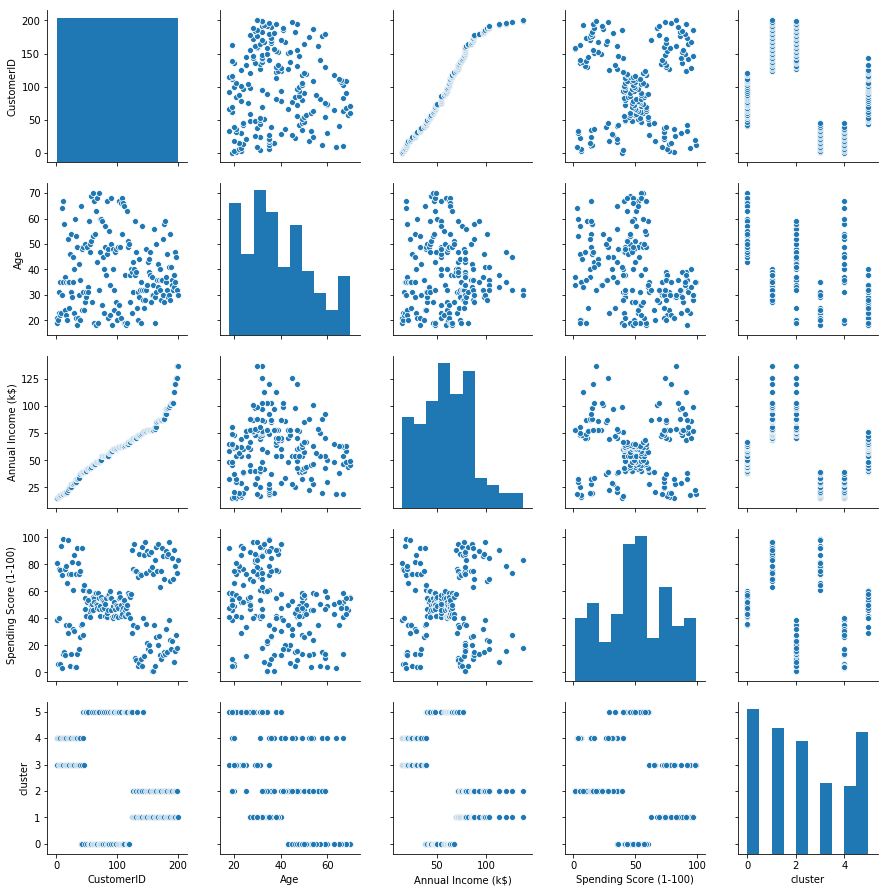

In [21]:
sns.pairplot(df)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
# Using only Spending_Score and income variable for easy visualisation and model preparation:

X = df.iloc[:, [3, 4]].values

In [22]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [9]:
print(X.shape)

(200, 2)


In [10]:
# Importing the DBscan algorithm and fitting the model on the dataset:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
model=db.fit(X)
y_means = db.fit_predict(X)
label=model.labels_

In [15]:
print(label)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0 -1 -1  0 -1  0 -1  0  0 -1  0 -1 -1
  0 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  2  1  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  2  3
  3 -1  3 -1 -1  4 -1 -1 -1  4  5  4 -1  4  5 -1  5  4 -1  4  5 -1 -1  6
 -1 -1 -1  7 -1  6 -1  6 -1  7 -1  6 -1  7 -1  7 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  8 -1  8 -1  8 -1  8 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [18]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

('No of clusters:', 9)


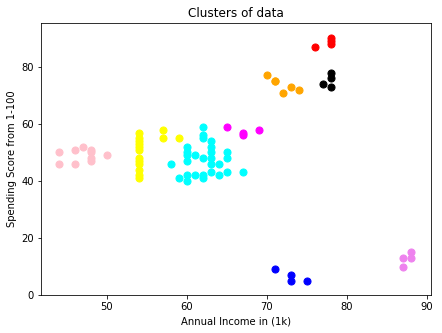

In [20]:
# Visualising the clusters
plt.figure(figsize=(7,5))
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(X[y_means == 5, 0], X[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(X[y_means == 6, 0], X[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(X[y_means == 7, 0], X[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(X[y_means == 8, 0], X[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()

In [ ]:
#Conclusion:We can finally derive that the above data can be visualized using 9 clusters as above.